# Time Series Forecasting of Airbnb Demand in Lisbon

This notebook develops and evaluates statistical forecasting models for monthly
Airbnb demand in Lisbon. Building on insights from exploratory analysis, a
Seasonal ARIMA (SARIMA) model is employed to capture both trend and seasonal
components in the data.


## Forecasting Objective

The objective of this analysis is to generate short-term forecasts of Airbnb
demand using historical review data. Accurate demand forecasting is relevant
for pricing strategies, capacity planning, and policy analysis in short-term
rental markets.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the time series data from CSV file
ts_df = pd.read_csv("../data/monthly_demand.csv")
# Convert the date column to datetime format
ts_df['date'] = pd.to_datetime(ts_df['date'])
# Set the date column as the index
ts_df.set_index('date', inplace=True)

# Set the frequency explicitly to month-end
ts_df = ts_df.asfreq('ME')  # 'M' or 'ME' for month-end frequency

# Extract the reviews_count column as our time series
ts = ts_df['reviews_count']
ts_df.head()

,reviews_count
date,
2010-07-31,1
2010-08-31,0
2010-09-30,2
2010-10-31,0
2010-11-30,0


## Train-Test Split

To evaluate forecasting performance, the dataset is divided into training and
testing subsets. The final 12 months of data are reserved for out-of-sample
evaluation, ensuring that model performance is assessed on unseen observations.


In [4]:

# Split data into training set (all but last 12 months) and test set (last 12 months)
train = ts[:-12]
test = ts[-12:]
train.tail(), test.head()

(date
 2024-06-30    32049
 2024-07-31    32827
 2024-08-31    34743
 2024-09-30    36076
 2024-10-31    34214
 Freq: ME, Name: reviews_count, dtype: int64,
 date
 2024-11-30    23057
 2024-12-31    16090
 2025-01-31    17313
 2025-02-28    18003
 2025-03-31    26020
 Freq: ME, Name: reviews_count, dtype: int64)

## Model Selection

Given the presence of trend and strong seasonality in the monthly demand series,
a Seasonal Autoregressive Integrated Moving Average (SARIMA) model is selected.

SARIMA models extend ARIMA by incorporating seasonal autoregressive and moving
average components, making them well-suited for forecasting periodic demand
patterns.


In [15]:

# Define SARIMAX model with parameters:
# - ARIMA order (p,d,q) = (1,1,1) for non-seasonal component
# - Seasonal order (P,D,Q,s) = (1,1,1,12) for seasonal component with 12-month seasonality
model = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,  # Don't enforce stationarity constraint
    enforce_invertibility=False  # Don't enforce invertibility constraint
)

# Fit the SARIMAX model to the training data
results = model.fit()

## Forecast Generation

Using the fitted SARIMA model, forecasts are generated for the test period.
These forecasts are compared against observed demand values to assess model
accuracy.


In [16]:

# Generate forecasts for the next 12 months
forecast = results.forecast(steps=12)


## Model Evaluation

Forecast accuracy is evaluated using Mean Absolute Error (MAE) and Root Mean
Squared Error (RMSE). These metrics provide complementary perspectives on model
performance by measuring average deviations and the magnitude of forecasting
errors.


In [17]:

# Calculate error metrics to evaluate forecast accuracy
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

## Forecast vs Actual Demand

A visual comparison of forecasted and observed demand values provides insight
into the model’s ability to capture seasonal patterns and short-term
fluctuations.


MAE: 7298.998939928938
RMSE: 12913.535471050109


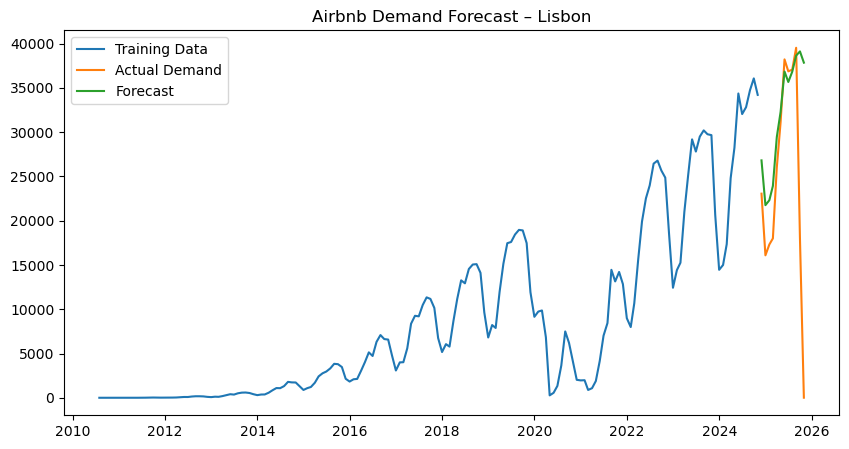

In [2]:


# Print the error metrics
print("MAE:", mae)
print("RMSE:", rmse)

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual Demand")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("Airbnb Demand Forecast – Lisbon")
plt.show()

## Interpretation of Results

The SARIMA model captures the seasonal structure of Airbnb demand effectively,
with forecasted values closely tracking observed demand during the evaluation
period. While some deviations are present, particularly during peak periods,
the model provides a reasonable approximation of short-term demand dynamics.


## Conclusion

This notebook demonstrates the application of seasonal time series models for
forecasting Airbnb demand in Lisbon. The results highlight the importance of
accounting for seasonality in tourism-driven markets.

Future work may explore alternative specifications, external regressors, or
machine learning approaches to further improve forecasting accuracy.
